In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### No Missing Value

In [3]:
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


### Time To Subway vs Sale Price Correlation

<AxesSubplot:xlabel='TimeToSubway', ylabel='SalePrice'>

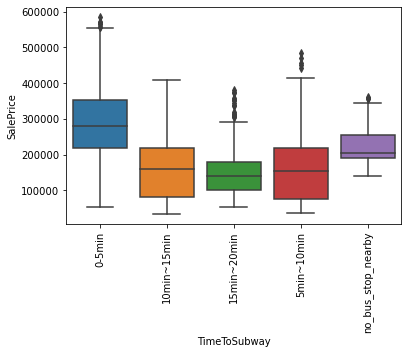

In [5]:
plt.xticks(rotation=90)
sns.boxplot(x='TimeToSubway', y='SalePrice', data=df)

### Hallway Type vs Sale Price Correlation

<AxesSubplot:xlabel='HallwayType', ylabel='SalePrice'>

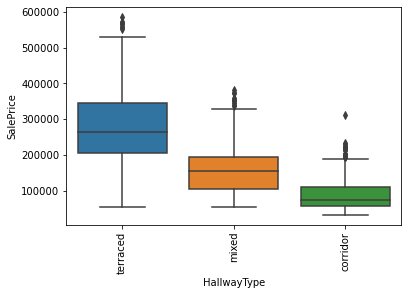

In [6]:
plt.xticks(rotation=90)
sns.boxplot(x='HallwayType', y='SalePrice', data=df)

In [7]:
df.corr()['SalePrice'].sort_values()

N_FacilitiesNearBy(PublicOffice)   -0.454402
N_FacilitiesNearBy(ETC)            -0.439968
N_SchoolNearBy(University)         -0.393332
YearBuilt                           0.446278
N_Parkinglot(Basement)              0.472419
N_FacilitiesInApt                   0.509327
Size(sqf)                           0.697685
SalePrice                           1.000000
Name: SalePrice, dtype: float64

Positive Correlations between saleprice:
1. N_Parkinglot(Basement)
2. YearBuilt 
3. N_FacilitiesInApt 
4. Size(sqf)

Negative Correlations between saleprice:
1. N_FacilitiesNearBy(ETC)
2. N_FacilitiesNearBy(PublicOffice)   
3. N_SchoolNearBy(University)

# Preprocessing

## Linear regression

In [8]:
from collections import Counter
from sklearn.metrics import mean_squared_error

In [9]:
Counter(df['TimeToSubway'])

Counter({'0-5min': 1953,
         '10min~15min': 583,
         '15min~20min': 629,
         '5min~10min': 787,
         'no_bus_stop_nearby': 171})

In [10]:
Counter(df['HallwayType'])

Counter({'terraced': 2528, 'mixed': 1131, 'corridor': 464})

### Change categorical value to numeric value

In [11]:
subwaytime_mapping = {'0-5min': 4, '5min~10min': 3, '10min~15min': 2, '15min~20min': 1, 'no_bus_stop_nearby': 0}
hallwaytype_mapping = {'terraced': 2, 'mixed': 1, 'corridor': 0}

In [12]:
df['TimeToSubway'] = df['TimeToSubway'].map(subwaytime_mapping)
df['HallwayType'] = df['HallwayType'].map(hallwaytype_mapping)

In [13]:
df.corr()['SalePrice']

HallwayType                         0.655383
TimeToSubway                        0.466509
N_FacilitiesNearBy(ETC)            -0.439968
N_FacilitiesNearBy(PublicOffice)   -0.454402
N_SchoolNearBy(University)         -0.393332
N_Parkinglot(Basement)              0.472419
YearBuilt                           0.446278
N_FacilitiesInApt                   0.509327
Size(sqf)                           0.697685
SalePrice                           1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

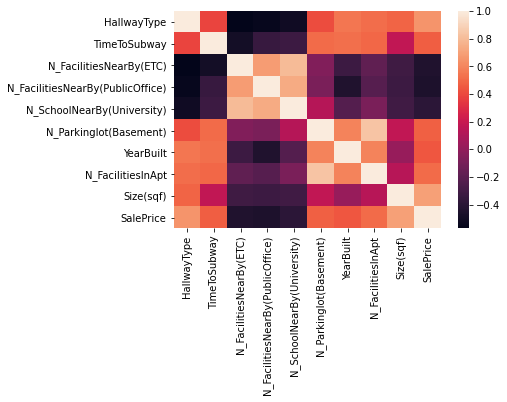

In [14]:
corr = df.corr()
sns.heatmap(corr)

In [15]:
corr.iloc[-1]

HallwayType                         0.655383
TimeToSubway                        0.466509
N_FacilitiesNearBy(ETC)            -0.439968
N_FacilitiesNearBy(PublicOffice)   -0.454402
N_SchoolNearBy(University)         -0.393332
N_Parkinglot(Basement)              0.472419
YearBuilt                           0.446278
N_FacilitiesInApt                   0.509327
Size(sqf)                           0.697685
SalePrice                           1.000000
Name: SalePrice, dtype: float64

### Skewness of SalePrice

In [16]:
df['SalePrice'].skew()

0.4523214920387305

In [17]:
features = df.dtypes[df.dtypes != "object"].index
df = df[features]

In [18]:
df.shape

(4123, 10)

# Standardization

In [19]:
from sklearn import preprocessing

X = df.iloc[:, :8].values
y= df.iloc[:, -1].values #Saleprice

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

# Cross validation

#### train: 70% , test: 30%

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# Fit model

In [21]:
from sklearn import linear_model

# fit linear model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
coef = lr.coef_
coef

array([ 46624.68158519,  14966.76467927,   6943.32729427, -12252.86211612,
       -18196.16933216,  34369.03989925, -12955.72156386,  -1602.8868195 ])

In [23]:
coef_df = pd.Series(coef, index=df.columns[0:8])
coef_df

HallwayType                         46624.681585
TimeToSubway                        14966.764679
N_FacilitiesNearBy(ETC)              6943.327294
N_FacilitiesNearBy(PublicOffice)   -12252.862116
N_SchoolNearBy(University)         -18196.169332
N_Parkinglot(Basement)              34369.039899
YearBuilt                          -12955.721564
N_FacilitiesInApt                   -1602.886820
dtype: float64

Text(0.5, 0, 'Coefficient')

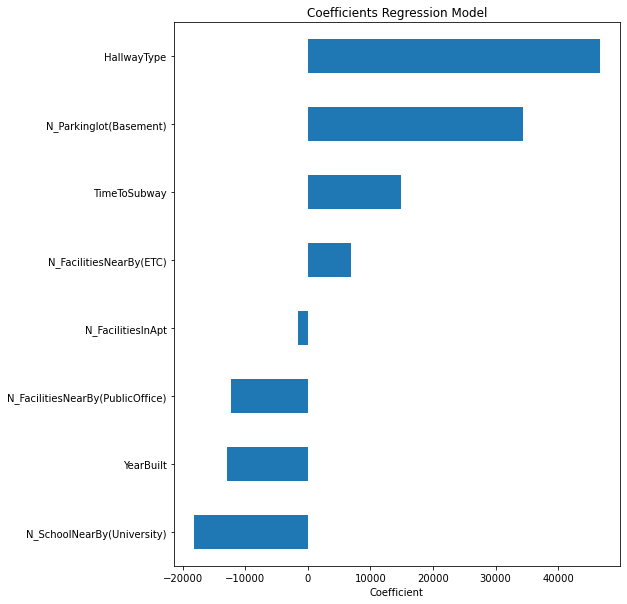

In [24]:
plt.rcParams['figure.figsize'] = (8, 10)
coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model")
plt.xlabel("Coefficient")

In [25]:
print ("Root Mean squared error : %.3f" %(np.mean((lr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % lr.score(X_test, y_test))

Root Mean squared error : 73517.161
Variance score: 0.508


Text(0, 0.5, 'Actual price')

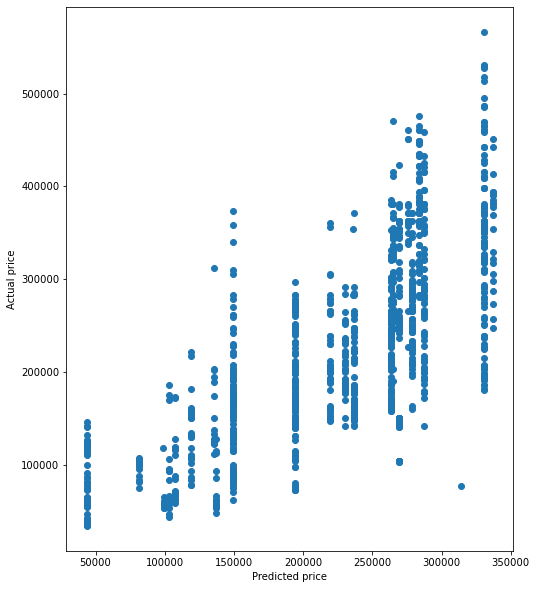

In [26]:
plt.scatter(lr.predict(X_test), y_test)

plt.xlabel('Predicted price')
plt.ylabel('Actual price')

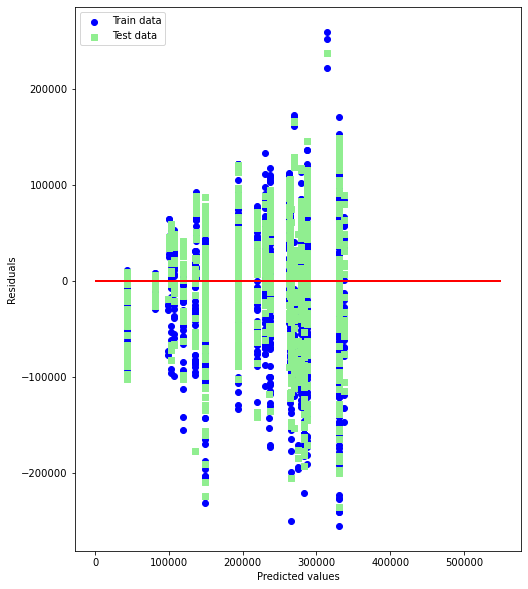

In [27]:
# residual plot
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0 ,xmin=0, xmax=550000, lw=2, color='red')
plt.show()

In [28]:
print("RMSE train: %.2f" % mean_squared_error(y_train, y_train_pred)**0.5)
print("RMSE test: %.2f"  % mean_squared_error(y_test, y_test_pred)**0.5)

RMSE train: 73063.39
RMSE test: 73517.16


# Dealing outliers

C:\Users\Moses\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      4123.000000
mean     221767.926995
std      106739.839945
min       32743.000000
25%      144752.000000
50%      209734.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

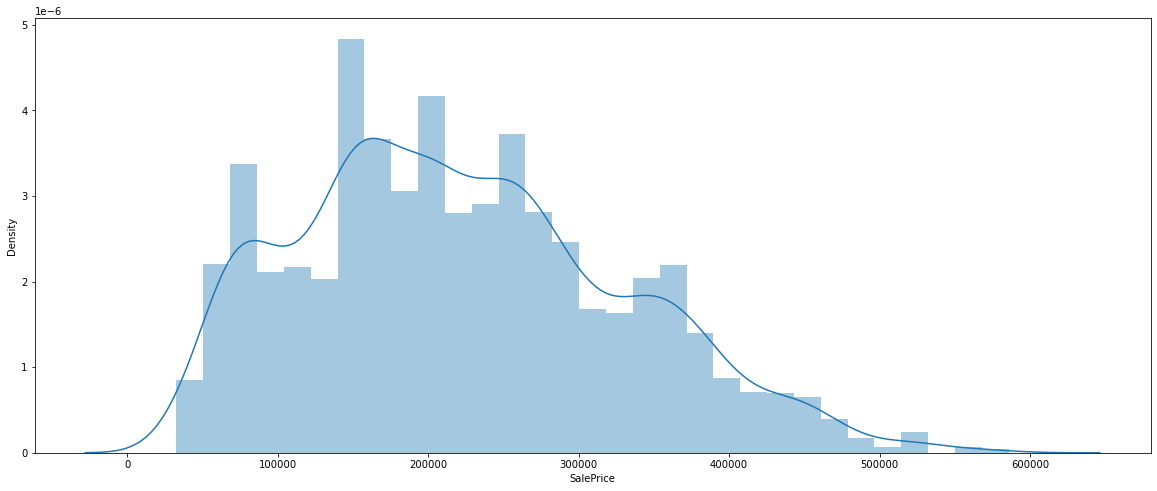

In [29]:
plt.figure(figsize=(20,8))
sns.distplot(df['SalePrice'])
df['SalePrice'].describe()

<AxesSubplot:ylabel='SalePrice'>

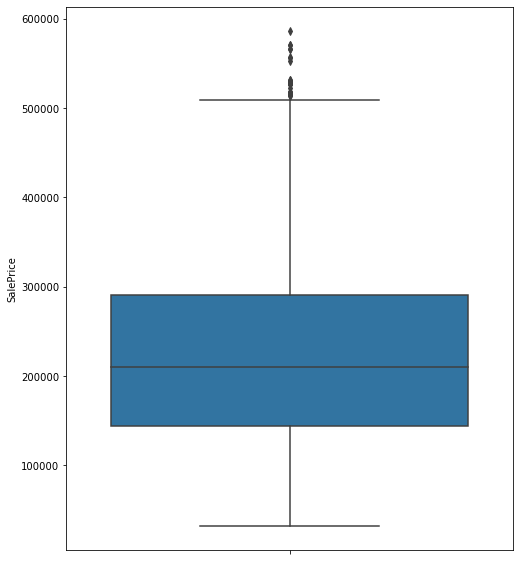

In [30]:
sns.boxplot(y=df['SalePrice'])

In [31]:
df.sort_values(by='SalePrice').loc[df['SalePrice']>510000]

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
3939,2,4,0.0,3.0,2.0,1270.0,2007,10,1643,513274
3502,2,4,5.0,7.0,5.0,1174.0,2014,9,1085,515044
1877,2,4,0.0,3.0,2.0,1270.0,2007,10,1643,515929
669,2,4,0.0,3.0,2.0,1270.0,2007,10,1928,517699
1982,2,4,0.0,3.0,2.0,1270.0,2007,10,1928,517699
2015,2,4,0.0,3.0,2.0,1270.0,2007,10,1643,517699
1895,2,4,0.0,3.0,2.0,1270.0,2007,10,1928,522123
1998,2,4,0.0,3.0,2.0,1270.0,2007,10,1643,526548
1295,2,4,0.0,3.0,2.0,1270.0,2007,10,1519,526548
3520,2,4,0.0,3.0,2.0,1270.0,2007,10,1928,526548


In [32]:
adj_df = df.drop(df.loc[df['SalePrice']>510000].index, axis=0)

In [33]:
X = adj_df.iloc[:, :8].values
y= adj_df.iloc[:, -1].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# refit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[0:8])

In [34]:
print ("Root Mean squared error : %.2f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.2f' % slr.score(X_test, y_test))

Root Mean squared error : 72341.29
Variance score: 0.52


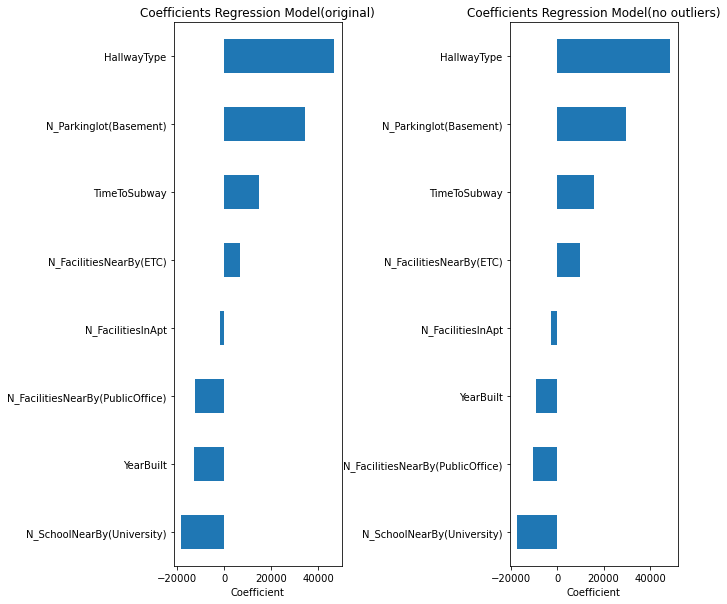

In [35]:
# compare
fig, ax = plt.subplots(nrows=1, ncols=2)

plt.subplot(1, 2, 1)
plt.rcParams['figure.figsize'] = (8, 10)
coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(original)")
plt.xlabel("Coefficient")


plt.subplot(1, 2, 2)
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(no outliers)")
plt.xlabel("Coefficient")

plt.subplots_adjust(wspace=1, right=1)

In [36]:
adj_df.drop(['N_Parkinglot(Basement)'], axis=1, inplace=True)

In [37]:
X = adj_df.iloc[:, :8].values
y= adj_df.iloc[:, -1].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# fit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[:8])

Text(0.5, 0, 'Coefficient')

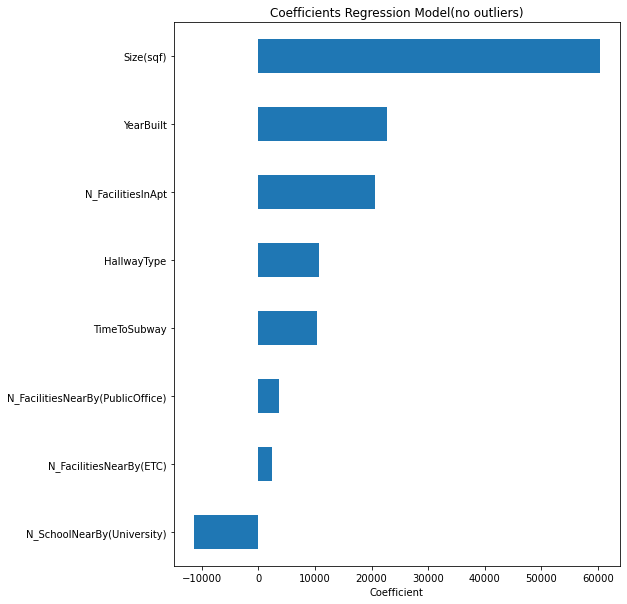

In [38]:
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(no outliers)")
plt.xlabel("Coefficient")

Text(0, 0.5, 'Actual price')

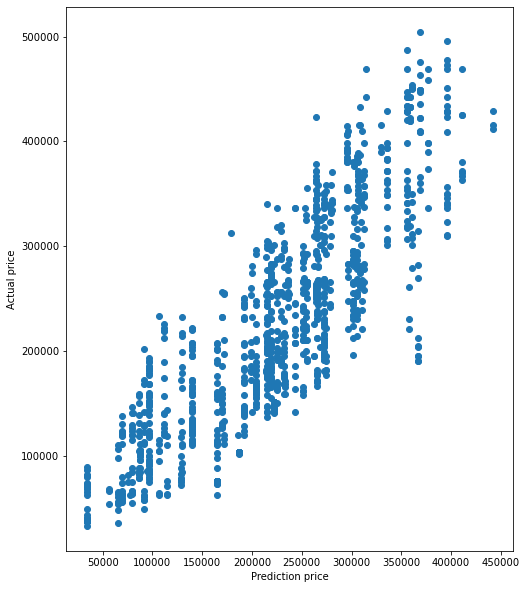

In [39]:
plt.scatter(slr.predict(X_test), y_test)

plt.xlabel('Prediction price')
plt.ylabel('Actual price')

### Better result 

In [40]:
print ("Root Mean squared error : %.3f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % slr.score(X_test, y_test))

Root Mean squared error : 55729.376
Variance score: 0.716


# Optimization
## Gradient descent

In [41]:
from sklearn import ensemble

X = adj_df.iloc[:, :8].values
y= adj_df.iloc[:, -1].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
rmse = mean_squared_error(y_test, clf.predict(X_test))**0.5
print("RMSE: %.3f" % rmse)

C:\Users\Moses\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


RMSE: 42529.081


Text(0, 0.5, 'Deviance')

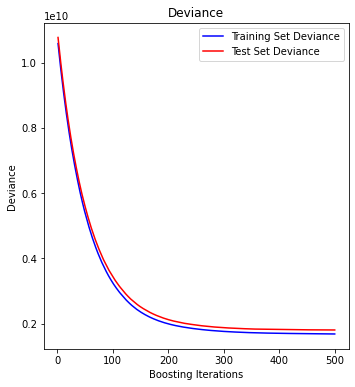

In [42]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

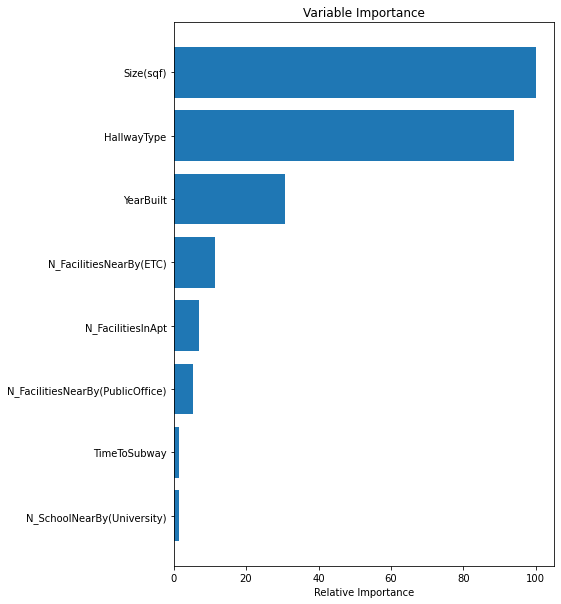

In [43]:
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplots(figsize=(15, 10))
plt.subplot(1, 2, 2)

adj_df.drop('SalePrice', axis=1, inplace=True)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, adj_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Text(0, 0.5, 'Actual price')

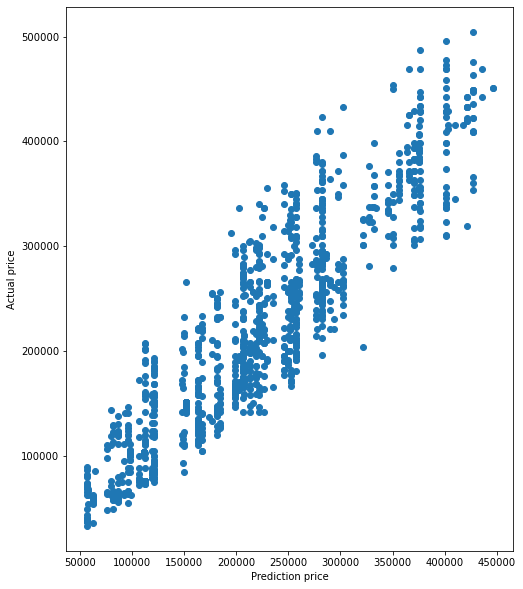

In [44]:
plt.scatter(clf.predict(X_test), y_test)

plt.xlabel('Prediction price')
plt.ylabel('Actual price')

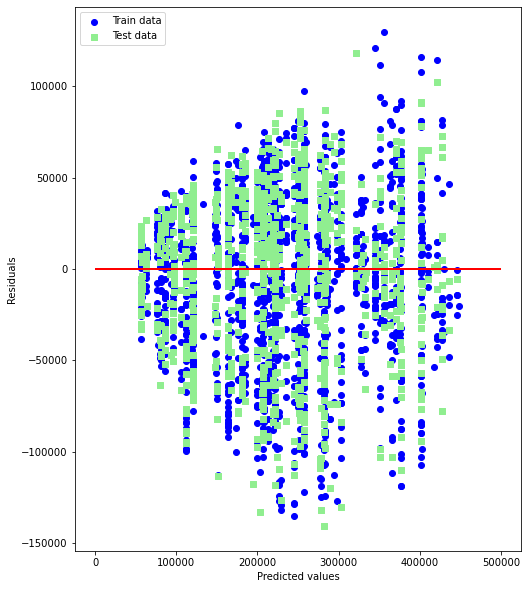

In [45]:
# residual plot
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0 ,xmin=0, xmax=500000, lw=2, color='red')
plt.show()

In [46]:
print ("Root Mean squared error : %.3f" %(np.mean((clf.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % clf.score(X_test, y_test))

Root Mean squared error : 42529.081
Variance score: 0.835


# Conclusion

### Rank of features affect on apartment price
#### 1. size(sqf)
#### 2. hallway type
#### 3. year built
#### 4. Number of Facilities Near By